<a href="https://colab.research.google.com/github/malowana/NLP_budzet_obywatelski/blob/main/Budzet_obywatelski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U spacy
!pip install -U NLTK

     |████████████████████████████████| 6.0 MB 4.1 MB/s 
     |████████████████████████████████| 181 kB 53.6 MB/s 
     |████████████████████████████████| 10.1 MB 31.3 MB/s 
     |████████████████████████████████| 628 kB 49.4 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 451 kB 48.1 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 1.5 MB

In [2]:
!pip install texthero
!pip3 install catboost
!pip install scikit-plot

     |████████████████████████████████| 10.4 MB 5.8 MB/s 
     |████████████████████████████████| 235 kB 49.1 MB/s 
     |████████████████████████████████| 184 kB 44.4 MB/s 
     |████████████████████████████████| 1.0 MB 48.0 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.2
    Uninstalling srsly-2.4.2:
      Successfully uninstalled srsly-2.4.2
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.6
    Uninstalling catalogue-2.0.6:
      Successfully uninstalled catalogue-2.0.6
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.13
    Uninstalling thinc-8.0.13:
      Successfully uninstalled thinc-8.0.13
  Attempting uninstall: spacy
    Found existing installation: spacy 3.2.1
    Uninstalling spacy-3.2.1:
      Successfully uninstalled spacy-3.2.1
     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [1]:
import pandas as pd
import numpy as np
import json
import texthero as hero
import pickle
import spacy

from gensim.utils import simple_preprocess
import catboost as ctb
import xgboost as xgb
from gensim.models import FastText
from scikitplot.estimators import plot_learning_curve
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from gensim.models import Word2Vec, Phrases

/usr/local/lib/python3.7/dist-packages/spacy/util.py:275: UserWarning:

[W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.7). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate



In [2]:
import nltk

In [3]:
!python -m spacy download pl_core_news_md

  Using cached pl_core_news_md-2.3.0-py3-none-any.whl
✔ Download and installation successful
You can now load the model via spacy.load('pl_core_news_md')


In [4]:
#df = pd.read_csv('/content/drive/MyDrive/Konkursy Kaggle/Budżet obywatelski/bo.csv').reset_index(drop=True)
df = pd.read_excel('/content/drive/My Drive/Konkursy Kaggle/Budżet obywatelski/budzet_obywatelski.xlsx', sheet_name='Arkusz1')

In [5]:
df.head()

,rok,miasto,nazwa,WSZYSTKO
0,2020,GDYNIA,Projektistatus,0
1,2020,GDYNIA,Doposażenie parku pomiędzy Estakadą Kwiatkowsk...,3
2,2020,GDYNIA,Cykliczne warsztaty dla seniorów z dzielnicy O...,0
3,2020,GDYNIA,"Ogród Sąsiedzki przy Dzikim Sadzie, ul. Źródlana",3
4,2020,GDYNIA,Montaż słupów oświetleniowych na chodniku przy...,0


In [6]:
df.columns

Index(['rok ', 'miasto ', 'nazwa', 'WSZYSTKO'], dtype='object')

In [7]:
df = df[~df['nazwa'].isna()]

In [8]:
df = df.drop_duplicates()

In [9]:
df['nazwa'] = df['nazwa'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
df["text_hero"] = hero.clean(df["nazwa"])
df.head(30)

,rok,miasto,nazwa,WSZYSTKO,text_hero
0,2020,GDYNIA,Projektistatus,0,projektistatus
1,2020,GDYNIA,Doposażenie parku pomiędzy Estakadą Kwiatkowsk...,3,doposazenie parku pomiedzy estakada kwiatkowsk...
2,2020,GDYNIA,Cykliczne warsztaty dla seniorów z dzielnicy O...,0,cykliczne warsztaty dla seniorow z dzielnicy o...
3,2020,GDYNIA,"Ogród Sąsiedzki przy Dzikim Sadzie, ul. Źródlana",3,ogrod sasiedzki przy dzikim sadzie ul zrodlana
4,2020,GDYNIA,Montaż słupów oświetleniowych na chodniku przy...,0,montaz slupow oswietleniowych na chodniku przy...
5,2020,GDYNIA,Cotygodniowe weekendowe lekcje tańca towarzysk...,0,cotygodniowe weekendowe lekcje tanca towarzysk...
6,2020,GDYNIA,Meble miejskie zaprojektowane przez dzieci. Po...,0,meble miejskie zaprojektowane przez dzieci pod...
7,2020,GDYNIA,"Odnowienie podwórek w obrębie ulic Płk. Dąbka,...",1,odnowienie podworek w obrebie ulic plk dabka k...
8,2020,GDYNIA,Poprawa atrakcyjności skweru przy skrzyżowaniu...,5,poprawa atrakcyjnosci skweru przy skrzyzowaniu...
9,2020,GDYNIA,Radarowe wyświetlacze prędkości na ul. Morskiej,0,radarowe wyswietlacze predkosci na ul morskiej


In [11]:
nlp = spacy.load("pl_core_news_md")

In [12]:
#docs = list(nlp.pipe(df.nazwa))

In [13]:
#lemantyzacja
#nlp=spacy.load('pl_core_news_sm')
doc = nlp("miejsce parkingowe dla osob z niepelnosprawnoscia")

[token.lemma_ for token in doc]

['miejsce', 'parkingowy', 'dla', 'osob', 'z', 'niepelnosprawnoscia']

In [14]:
#usuwanie stopwords, znaki interpunkcyjne, białe znaki etc.
def apply_lemma(text):
  #text=nlp(text)
  words = [token.lemma_ for token in text
          if not token.is_stop and not token.is_punct and not token.is_space and not token.is_digit and len(token) > 2]
  return words

text=nlp(df["nazwa"][4])
apply_lemma(text)


['montaż',
 'słup',
 'oświetleniowych',
 'chodnik',
 'niski',
 'odcinek',
 'pomiędzy',
 'bohater',
 'getto',
 'warszawski',
 'hodowlaną']

In [25]:

df['hero_without_sw'] = df['hero_without_sw'].apply(str)

In [31]:
df["hero_without_sw"] = df["text_hero"].map(lambda x: apply_lemma(nlp(x)))
df.head()

,rok,miasto,nazwa,WSZYSTKO,text_hero,without_sw,without_sw2,hero_without_sw,hero_without_sw2
0,2020,GDYNIA,Projektistatus,0,projektistatus,[projektistatus],projektistatus,[projektistatus],[ ' p r o j e k t i s t a t u s ' ]
1,2020,GDYNIA,Doposażenie parku pomiędzy Estakadą Kwiatkowsk...,3,doposazenie parku pomiedzy estakada kwiatkowsk...,"[doposażenie, park, pomiędzy, estakada, Kwiatk...",doposażenie park pomiędzy estakada Kwiatkowski...,"[doposazenie, park, pomiedzy, estakada, kwiatk...","[ ' d o p o s a z e n i e ' , ' p a r k ' , ..."
2,2020,GDYNIA,Cykliczne warsztaty dla seniorów z dzielnicy O...,0,cykliczne warsztaty dla seniorow z dzielnicy o...,"[cykliczny, warsztat, senior, dzielnica, obłuż...",cykliczny warsztat senior dzielnica obłuże roz...,"[cykliczny, warsztat, seniorow, dzielnica, obl...","[ ' c y k l i c z n y ' , ' w a r s z t a t ..."
3,2020,GDYNIA,"Ogród Sąsiedzki przy Dzikim Sadzie, ul. Źródlana",3,ogrod sasiedzki przy dzikim sadzie ul zrodlana,"[ogród, sąsiedzki, dziki, sadź, źródlana]",ogród sąsiedzki dziki sadź źródlana,"[ogroda, sasiedzki, dziki, sadź, zrodlana]","[ ' o g r o d a ' , ' s a s i e d z k i ' , ..."
4,2020,GDYNIA,Montaż słupów oświetleniowych na chodniku przy...,0,montaz slupow oswietleniowych na chodniku przy...,"[montaż, słup, oświetleniowych, chodnik, niski...",montaż słup oświetleniowych chodnik niski odci...,"[montaz, slupow, oswietleniowych, chodnik, nis...","[ ' m o n t a z ' , ' s l u p o w ' , ' o ..."


In [34]:
df["hero_without_sw2"] = df["hero_without_sw"].map(lambda x: " ".join(x))

In [35]:
df.head()

,rok,miasto,nazwa,WSZYSTKO,text_hero,without_sw,without_sw2,hero_without_sw,hero_without_sw2
0,2020,GDYNIA,Projektistatus,0,projektistatus,[projektistatus],projektistatus,[projektistatus],projektistatus
1,2020,GDYNIA,Doposażenie parku pomiędzy Estakadą Kwiatkowsk...,3,doposazenie parku pomiedzy estakada kwiatkowsk...,"[doposażenie, park, pomiędzy, estakada, Kwiatk...",doposażenie park pomiędzy estakada Kwiatkowski...,"[doposazenie, park, pomiedzy, estakada, kwiatk...",doposazenie park pomiedzy estakada kwiatkowski...
2,2020,GDYNIA,Cykliczne warsztaty dla seniorów z dzielnicy O...,0,cykliczne warsztaty dla seniorow z dzielnicy o...,"[cykliczny, warsztat, senior, dzielnica, obłuż...",cykliczny warsztat senior dzielnica obłuże roz...,"[cykliczny, warsztat, seniorow, dzielnica, obl...",cykliczny warsztat seniorow dzielnica obluze r...
3,2020,GDYNIA,"Ogród Sąsiedzki przy Dzikim Sadzie, ul. Źródlana",3,ogrod sasiedzki przy dzikim sadzie ul zrodlana,"[ogród, sąsiedzki, dziki, sadź, źródlana]",ogród sąsiedzki dziki sadź źródlana,"[ogroda, sasiedzki, dziki, sadź, zrodlana]",ogroda sasiedzki dziki sadź zrodlana
4,2020,GDYNIA,Montaż słupów oświetleniowych na chodniku przy...,0,montaz slupow oswietleniowych na chodniku przy...,"[montaż, słup, oświetleniowych, chodnik, niski...",montaż słup oświetleniowych chodnik niski odci...,"[montaz, slupow, oswietleniowych, chodnik, nis...",montaz slupow oswietleniowych chodnik niski od...


# Nowa sekcja

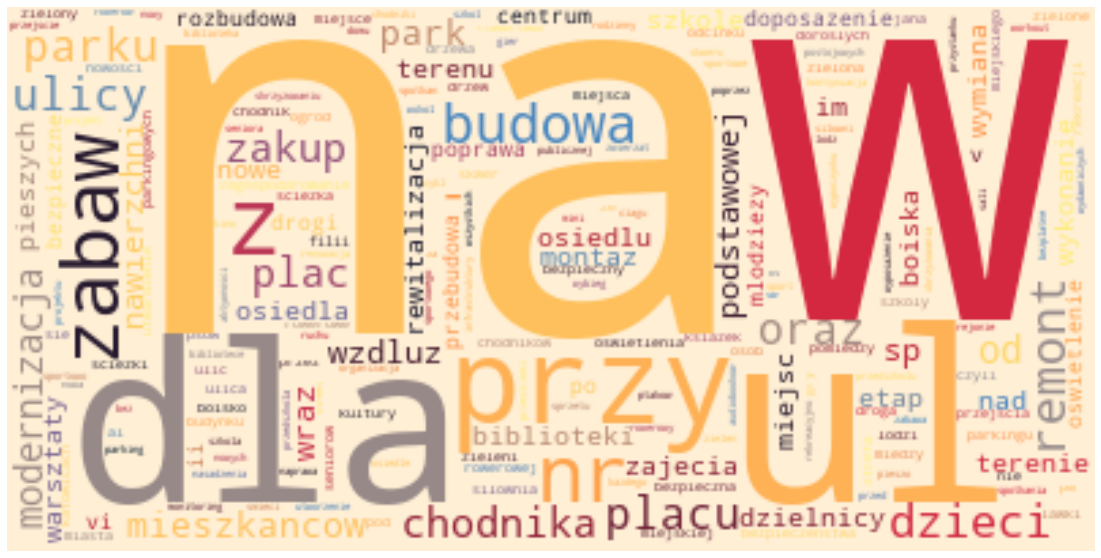

In [ ]:
hero.visualization.wordcloud(df["text_hero"])

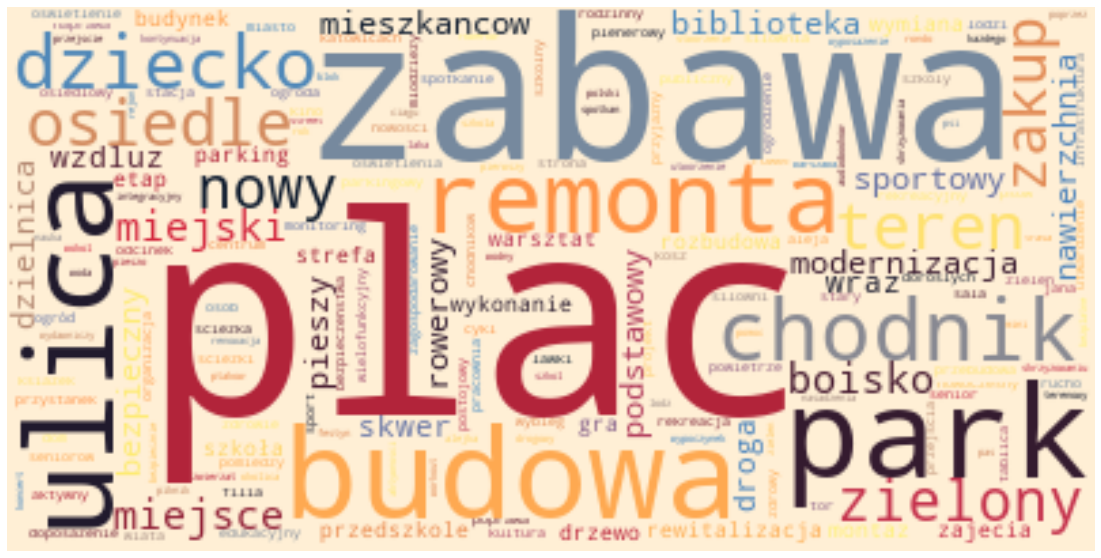

In [36]:
hero.visualization.wordcloud(df["hero_without_sw2"])

In [33]:
from collections import Counter
cnt = Counter()
df['hero_without_sw'].map(cnt.update)
cnt.most_common()

[('plac', 1971),
 ('zabawa', 1906),
 ('park', 1721),
 ('budowa', 1681),
 ('ulica', 1581),
 ('remonta', 1322),
 ('chodnik', 1315),
 ('dziecko', 1288),
 ('osiedle', 965),
 ('teren', 962),
 ('zielony', 910),
 ('nowy', 883),
 ('zakup', 863),
 ('miejsce', 831),
 ('boisko', 829),
 ('miejski', 793),
 ('modernizacja', 780),
 ('bezpieczny', 764),
 ('rowerowy', 740),
 ('biblioteka', 687),
 ('mieszkancow', 632),
 ('sportowy', 619),
 ('nawierzchnia', 614),
 ('pieszy', 587),
 ('dzielnica', 578),
 ('podstawowy', 558),
 ('droga', 504),
 ('wraz', 493),
 ('wzdluz', 482),
 ('skwer', 481),
 ('rewitalizacja', 479),
 ('parking', 459),
 ('zajecia', 458),
 ('etap', 457),
 ('drzewo', 425),
 ('przedszkole', 408),
 ('wymiana', 401),
 ('warsztat', 394),
 ('szkoła', 379),
 ('wykonanie', 362),
 ('strefa', 353),
 ('montaz', 346),
 ('gra', 340),
 ('rozbudowa', 323),
 ('budynek', 318),
 ('rekreacyjny', 314),
 ('doposazenie', 313),
 ('mlodziezy', 312),
 ('stary', 302),
 ('filia', 301),
 ('centrum', 299),
 ('przebudowa